In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings

In [2]:
df = pd.read_csv('data_cleaned_translated.csv')

In [3]:
df.shape

(241, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'topic', 'usage situation', 'type of business',
       'review date', 'overall rating', 'review', 'number of accounts used',
       'effects after introducing the service', 'rate ease of use',
       'rate helpfulness', 'rate customizability',
       'rate functional satisfaction', 'rate service stability'],
      dtype='object')

In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,topic,usage situation,type of business,review date,overall rating,review,number of accounts used,effects after introducing the service,rate ease of use,rate helpfulness,rate customizability,rate functional satisfaction,rate service stability
0,Great job on customer support,using,Consulting Service,2022-07-28,4,You can manage the history of previous interac...,>201-300,"In the past, sales management and personnel ma...",4.0,4.0,4.0,4.0,4.0
1,You can share customer management in one app.,using,IT related Service,2022-07-28,5,By collectively managing internal customer inf...,>51-100,"Conversations, reactions and characteristics w...",4.0,4.0,5.0,5.0,4.0
2,If you do not spend time consulting at the tim...,using,Food and Leisure Service,2022-07-22,3,Consultation at the time of introduction is th...,>51-100,It was great that we were able to consolidate ...,2.0,3.0,2.0,2.0,5.0
3,Customer management made easy,using,IT related Service,2022-07-20,4,"With this service, you can manage customer inf...",>1,"Customer management used to be done on paper, ...",2.0,4.0,3.0,4.0,3.0
4,Interdepartmental links can be made stronger,using,Manufacturer/manufacturing system,2022-07-19,5,Salesforce Sales Cloud has a very easy-to-read...,2-10,"By using Salesforce Sales Cloud, it is no long...",4.0,5.0,3.0,4.0,3.0


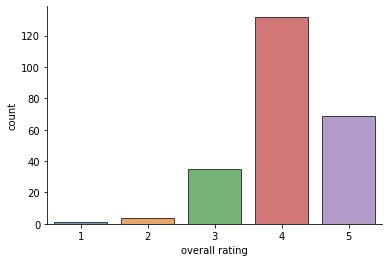

In [6]:
sns.countplot(x='overall rating',alpha=0.7,edgecolor="black", data=df)
sns.despine()
# plt.title("Features : {} ".format(i))

In [7]:
df.columns

Index(['topic', 'usage situation', 'type of business', 'review date',
       'overall rating', 'review', 'number of accounts used',
       'effects after introducing the service', 'rate ease of use',
       'rate helpfulness', 'rate customizability',
       'rate functional satisfaction', 'rate service stability'],
      dtype='object')

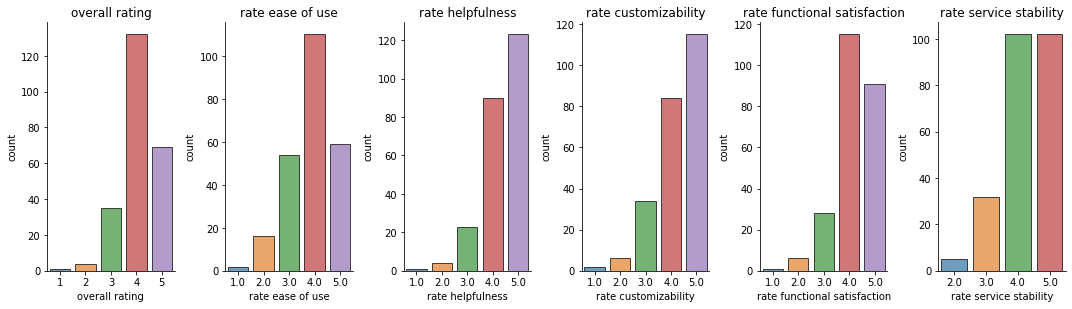

In [33]:
plt.figure(figsize=[15,8])
col=['overall rating', 'rate ease of use',
       'rate helpfulness', 'rate customizability',
       'rate functional satisfaction', 'rate service stability']
n=1
for i in col:
    plt.subplot(2,6,n)
    sns.countplot(x=i,alpha=0.7,edgecolor="black", data=df)
    sns.despine()
    plt.title("{}".format(i))
    n=n+1
plt.tight_layout()
plt.show()

In [9]:
df['evaluation'] = df['overall rating']

In [10]:
df['evaluation'] = df['evaluation'].astype(int)

In [12]:
df.loc[df['evaluation'] < 4, 'evaluation'] = 'low'
df.loc[df['evaluation'] == 5, 'evaluation'] = 'high'
df.loc[df['evaluation'] == 4, 'evaluation'] = 'high'

In [13]:
df.head()

,topic,usage situation,type of business,review date,overall rating,review,number of accounts used,effects after introducing the service,rate ease of use,rate helpfulness,rate customizability,rate functional satisfaction,rate service stability,evaluation
0,Great job on customer support,using,Consulting Service,2022-07-28,4,You can manage the history of previous interac...,>201-300,"In the past, sales management and personnel ma...",4.0,4.0,4.0,4.0,4.0,high
1,You can share customer management in one app.,using,IT related Service,2022-07-28,5,By collectively managing internal customer inf...,>51-100,"Conversations, reactions and characteristics w...",4.0,4.0,5.0,5.0,4.0,high
2,If you do not spend time consulting at the tim...,using,Food and Leisure Service,2022-07-22,3,Consultation at the time of introduction is th...,>51-100,It was great that we were able to consolidate ...,2.0,3.0,2.0,2.0,5.0,low
3,Customer management made easy,using,IT related Service,2022-07-20,4,"With this service, you can manage customer inf...",>1,"Customer management used to be done on paper, ...",2.0,4.0,3.0,4.0,3.0,high
4,Interdepartmental links can be made stronger,using,Manufacturer/manufacturing system,2022-07-19,5,Salesforce Sales Cloud has a very easy-to-read...,2-10,"By using Salesforce Sales Cloud, it is no long...",4.0,5.0,3.0,4.0,3.0,high


In [24]:
df_dum = df[['usage situation', 'type of business', 'overall rating', 'number of accounts used', 'evaluation']]

In [25]:
df_dum = pd.get_dummies(df_dum, prefix = ['usage', 'b', '#account', 'eval'], 
                   columns = ['usage situation', 'type of business', 'number of accounts used', 'evaluation'] )

In [26]:
mask = np.zeros_like(df_dum.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

/var/folders/4g/4qrhhk3j3kv_nf1xv032ysbw0000gn/T/ipykernel_18887/3957212441.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_dum.corr(), dtype=np.bool)


<AxesSubplot:>

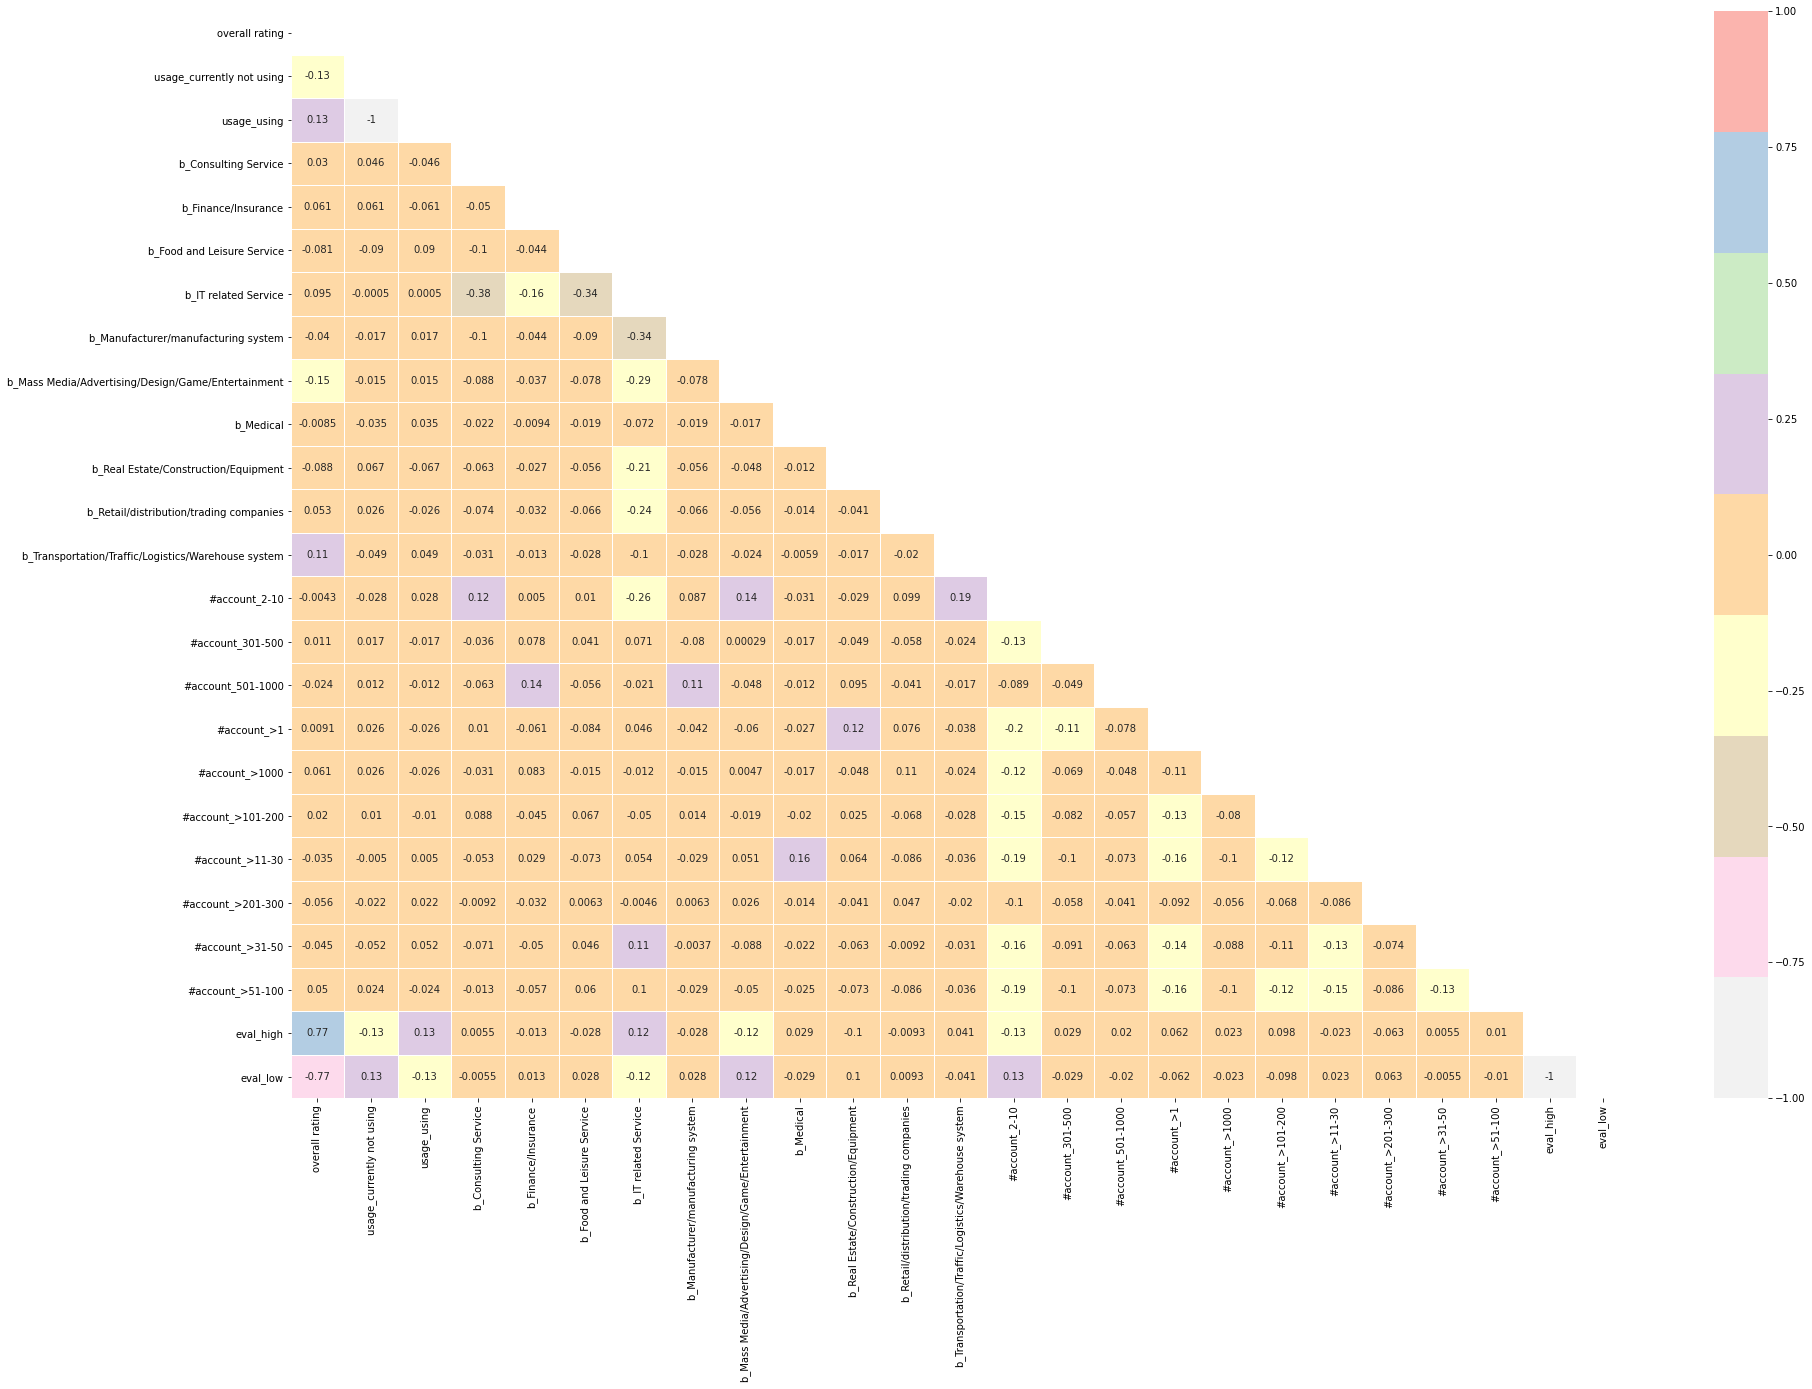

In [27]:
plt.figure(figsize = (30,20))

sns.heatmap(df_dum.corr(), 
            mask = mask,
            annot=True, 
            cmap = 'Pastel1_r',
            vmax=1,
            vmin=-1,
            linewidths=.5,
            robust=True)

In [28]:
# Top correlations
corr_matrix = df_dum.corr()
d_top = corr_matrix['overall rating'].sort_values(ascending=False)
print('Top Correlations are: \n', d_top.head(10))

Top Correlations are: 
 overall rating                                         1.000000
eval_high                                              0.765938
usage_using                                            0.125577
b_Transportation/Traffic/Logistics/Warehouse system    0.114076
b_IT related Service                                   0.094542
b_Finance/Insurance                                    0.061115
#account_>1000                                         0.060815
b_Retail/distribution/trading companies                0.053452
#account_>51-100                                       0.049663
b_Consulting Service                                   0.030281
Name: overall rating, dtype: float64


In [29]:
# Bottom correlations
d_down = corr_matrix['overall rating'].sort_values(ascending=True)
print('Top Negative Correlations are: \n', d_down.head(10))

Top Negative Correlations are: 
 eval_low                                             -0.765938
b_Mass Media/Advertising/Design/Game/Entertainment   -0.152284
usage_currently not using                            -0.125577
b_Real Estate/Construction/Equipment                 -0.088242
b_Food and Leisure Service                           -0.081052
#account_>201-300                                    -0.056181
#account_>31-50                                      -0.044760
b_Manufacturer/manufacturing system                  -0.039579
#account_>11-30                                      -0.034624
#account_501-1000                                    -0.024379
Name: overall rating, dtype: float64


In [30]:
corr_matrix = df_dum.corr()
d_top = corr_matrix['eval_high'].sort_values(ascending=False)
print('Top Correlations are: \n', d_top.head(10))

Top Correlations are: 
 eval_high                                              1.000000
overall rating                                         0.765938
usage_using                                            0.134733
b_IT related Service                                   0.117634
#account_>101-200                                      0.098283
#account_>1                                            0.061795
b_Transportation/Traffic/Logistics/Warehouse system    0.040808
#account_301-500                                       0.029368
b_Medical                                              0.028796
#account_>1000                                         0.022602
Name: eval_high, dtype: float64


Salesforce cloud has an overeall rating high for companies such as It related service, Finance/Insurance, or Retail/distribution/trading companies.

On the other hand, for companies such as Real Estate/Construction/Equipment, Food and Leisure Service, or Manufacturer/manufacturing system   had a negative correlation to the overall rating. 

It seems like Salesforce cloud is more usable for tech related companies. 

I will investigate more what are the key causes for the negative correlations for those companies listed above

In [21]:
df2 = df.iloc[:, 0:-5]

In [22]:
df2 = pd.get_dummies(df2, prefix = ['usage', 'b', '#account'], 
                   columns = ['usage situation', 'type of business', 'number of accounts used'])

In [23]:
df2.head()

,topic,review date,overall rating,review,effects after introducing the service,rate ease of use,usage_currently not using,usage_using,b_Consulting Service,b_Finance/Insurance,...,#account_2-10,#account_301-500,#account_501-1000,#account_>1,#account_>1000,#account_>101-200,#account_>11-30,#account_>201-300,#account_>31-50,#account_>51-100
0,Great job on customer support,2022-07-28,4,You can manage the history of previous interac...,"In the past, sales management and personnel ma...",4.0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,You can share customer management in one app.,2022-07-28,5,By collectively managing internal customer inf...,"Conversations, reactions and characteristics w...",4.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,If you do not spend time consulting at the tim...,2022-07-22,3,Consultation at the time of introduction is th...,It was great that we were able to consolidate ...,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Customer management made easy,2022-07-20,4,"With this service, you can manage customer inf...","Customer management used to be done on paper, ...",2.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Interdepartmental links can be made stronger,2022-07-19,5,Salesforce Sales Cloud has a very easy-to-read...,"By using Salesforce Sales Cloud, it is no long...",4.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
df.to_csv('data_cleaned_translated_dummified.csv')